In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Set the backend of matplotlib to the 'inline' backend
%matplotlib inline

In [3]:
#Formatting outputs using pandas
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16,8)

In [4]:
#Loading Dataset
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<AxesSubplot:>

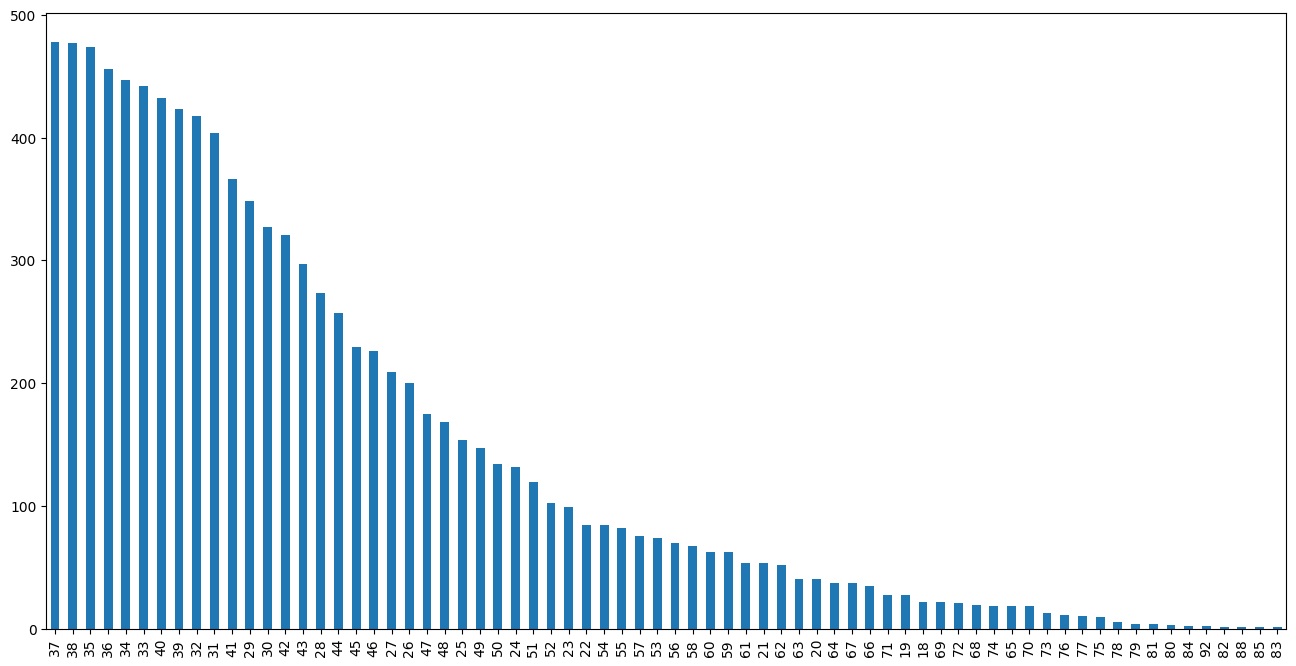

In [6]:
df['Age'].value_counts().head(10000).plot.bar()

<AxesSubplot:>

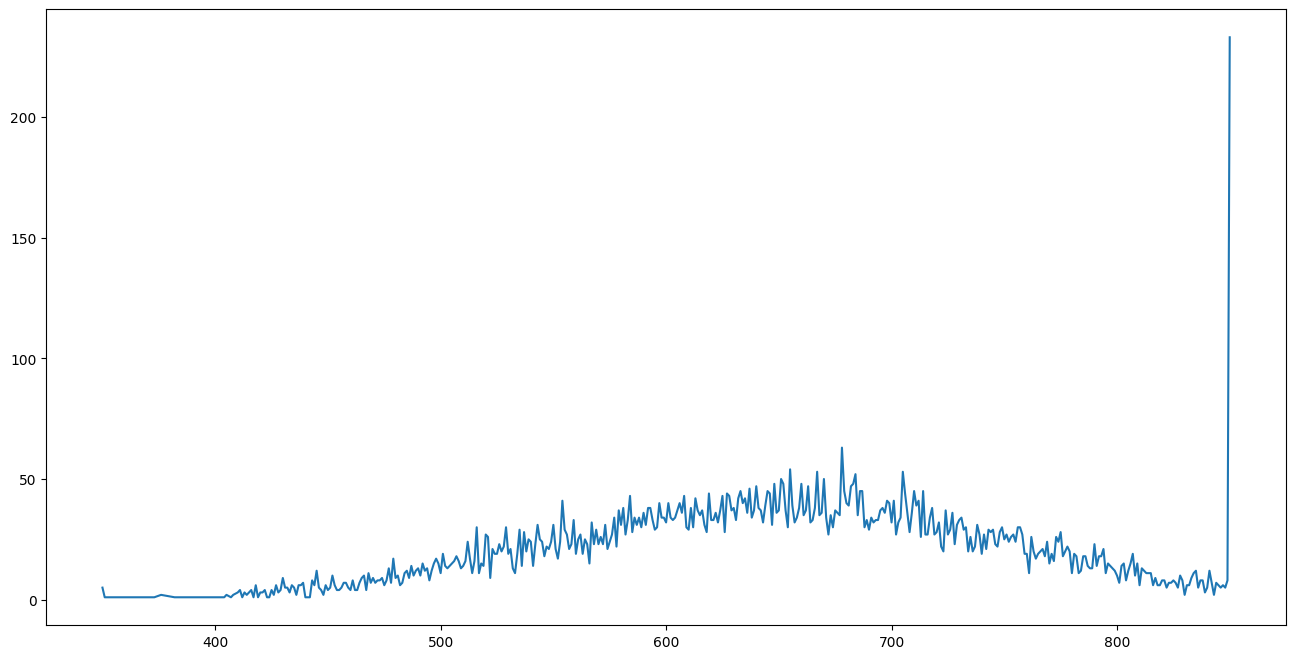

In [7]:
df['CreditScore'].value_counts().sort_index().plot.line()

<AxesSubplot:>

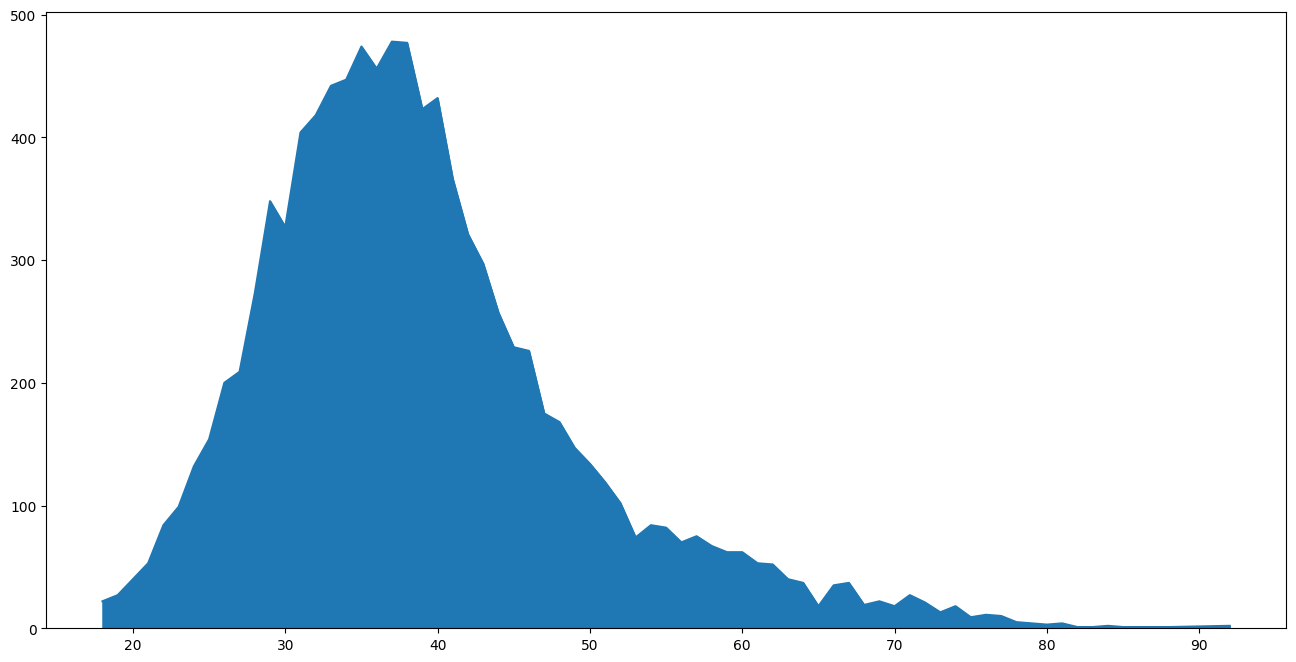

In [8]:
df['Age'].value_counts().sort_index().plot.area()

<AxesSubplot:ylabel='Frequency'>

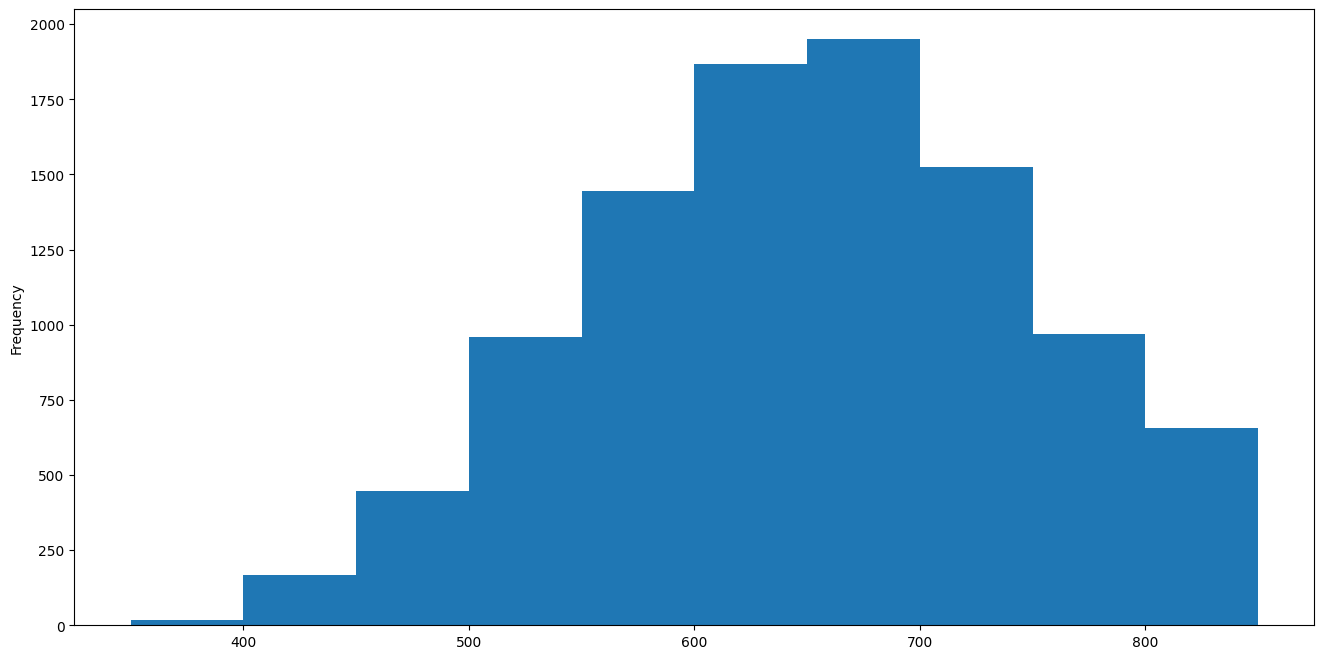

In [9]:
df['CreditScore'].plot.hist()

<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

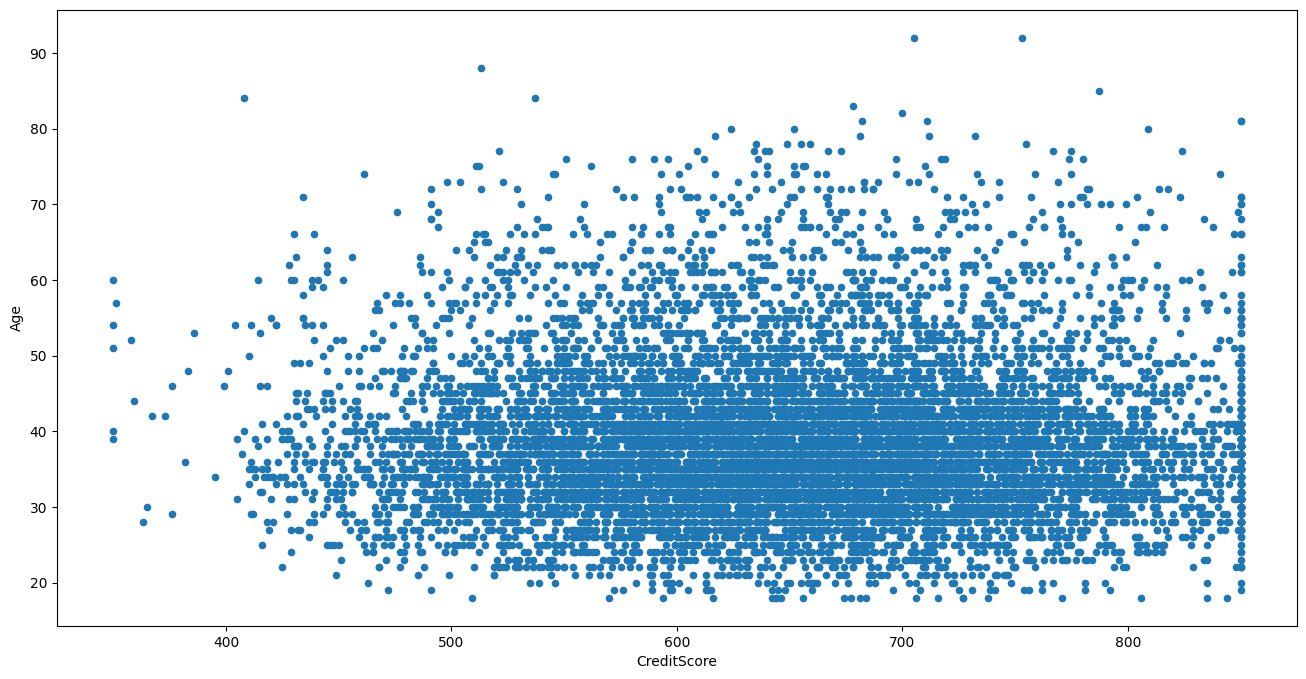

In [10]:
df[df['CreditScore']<100000].plot.scatter(x='CreditScore', y='Age')

<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

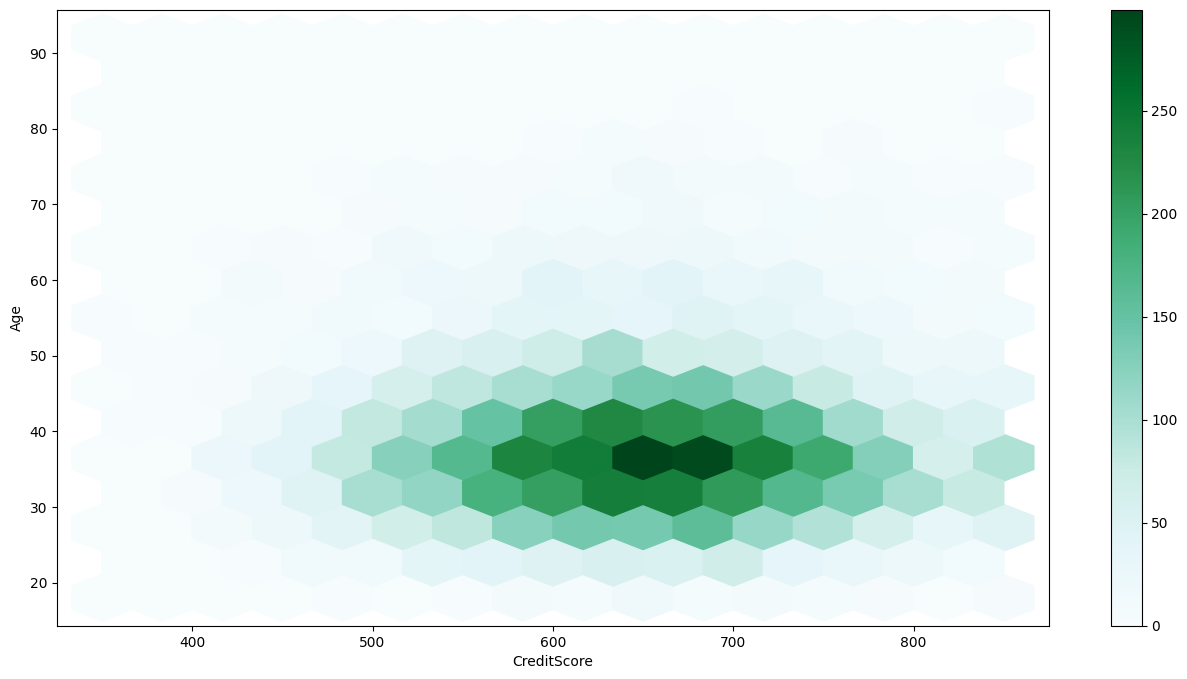

In [11]:
df[df['CreditScore']<100000].plot.hexbin(x='CreditScore', y='Age',gridsize=15)

<AxesSubplot:>

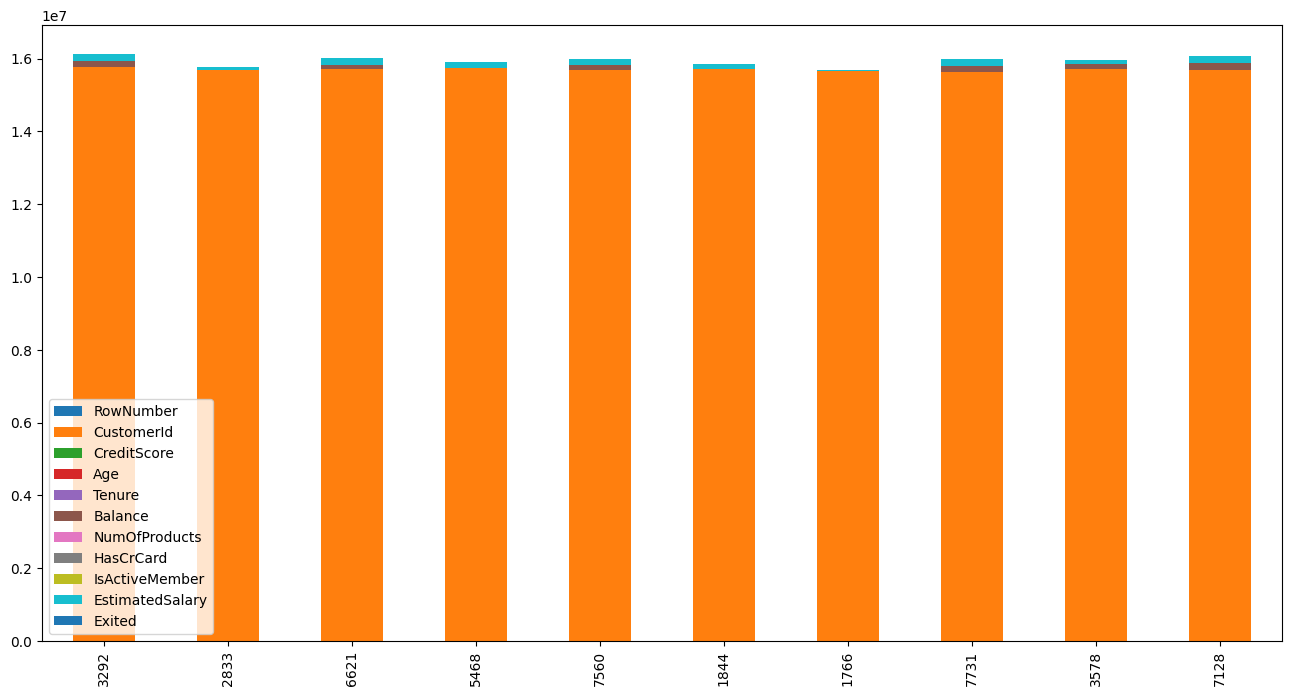

In [12]:
df.sample(10).plot.bar(stacked=True)

<AxesSubplot:>

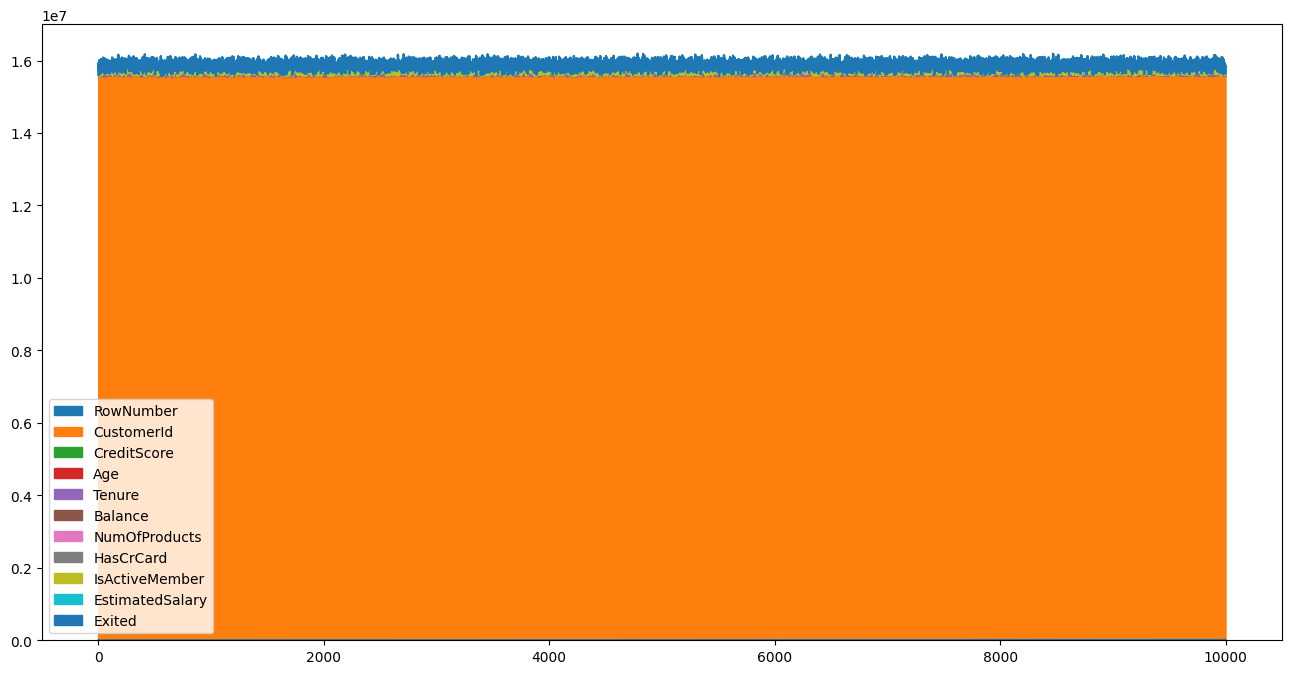

In [13]:
df.plot.area()

<AxesSubplot:>

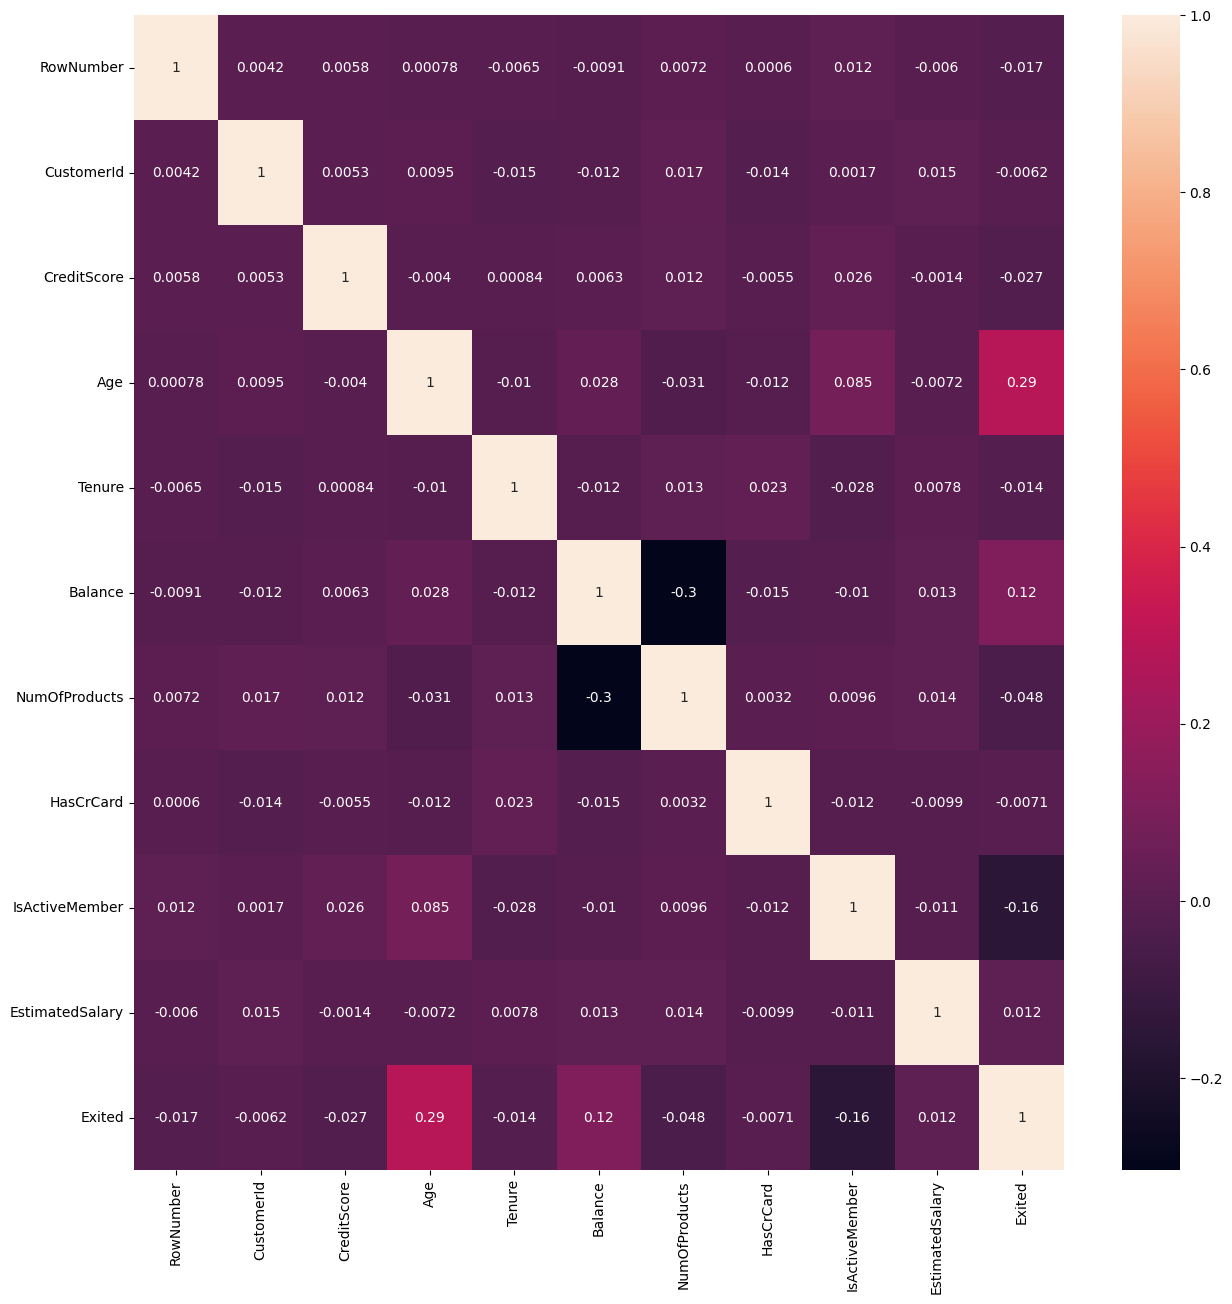

In [14]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)

In [15]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

### Check Missing Values

In [16]:
#Check Missing Values
def num_obj_features(df):
    num_cols = []
    obj_cols = []
    s= df.dtypes
    for i in s.index:
        if (s[i] == 'int64' or s[i] == 'float64'):
            num_cols.append(i)
        elif s[i]== 'object':
            obj_cols.append(i)
        else:
            pass
    return num_cols, obj_cols

num_col, obj_col = num_obj_features(df)

In [17]:
df[num_col].head()
df[obj_col].head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


### Find And Replace Outliers

In [18]:
####Find And Replace Outliers
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace=True)

In [19]:
def find_outlier(data):
    outlier = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier
Score_list = df['CreditScore'].tolist()
Balance_list = df['Balance'].tolist()
Salary_list = df['EstimatedSalary'].tolist()

In [20]:
Score_outlier = find_outlier(Score_list)
Score_outlier

[359, 350, 350, 358, 351, 350, 350, 350]

In [21]:
Balance_outlier = find_outlier(Balance_list)
Balance_outlier

[]

In [22]:
Salary_outlier = find_outlier(Salary_list)
Salary_outlier

[]

In [23]:
print("Shape of Data before removing outliers: {}".format(df.shape))


Shape of Data before removing outliers: (10000, 11)


In [24]:
df.drop(df[df['CreditScore'] <= 359].index, inplace = True)

In [25]:
print("Shape of Data after removing outliers: {}".format(df.shape))

Shape of Data after removing outliers: (9992, 11)


### Split Dataset

In [26]:
###Split Dataset
X= df.drop(['Exited'], axis = 1)
y = df['Exited']

### Creating Dummy Variables

In [28]:
###Creating Dummy Variables
dummy_vars = pd.get_dummies(X[['Geography', 'Gender']],drop_first=True)
X = X.drop(['Geography', 'Gender'], axis = 1)
X = pd.concat([X, dummy_vars], axis = 1)

### Splitting Dataset Into Train Test

In [ ]:
###Splitting Dataset Into Train Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [ ]:
###Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)